<a href="https://colab.research.google.com/github/yugantshah/fluent_python_v2/blob/main/chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [2]:
beer_card = Card('7', 'diamonds')

In [5]:
beer_card

Card(rank='7', suit='diamonds')

`__getitem__` delegates to the [] operator of `self._cards`, our deck automatically supports slicing.

deck = FrenchDeck()

In [6]:
deck[0]

Card(rank='2', suit='spades')

In [7]:
deck[-1]

Card(rank='A', suit='hearts')

In [8]:
deck = FrenchDeck()
len(deck)

52

Here’s how we look at the top three cards from a brand-new deck

In [9]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

Then pick just the aces by starting at index 12 and skipping 13 cards at a time. Just by implementing the `__getitem__` special method, our deck is also iterable:

In [10]:
deck[12::13]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [11]:
for card in deck:
  print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

In [12]:
for card in reversed(deck):  # doctest: +ELLIPSIS
   print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

Iteration is often implicit. If a collection has no `__contains__` method, the in operator does a sequential scan. Case in point: `in` works with our FrenchDeck class because it is iterable. Check it out:

In [13]:
Card('Q', 'hearts') in deck

True

In [14]:
Card('7', 'beasts') in deck

False

**Sorting**

In [15]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

In [16]:
def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

In [17]:
for card in sorted(deck, key=spades_high):
  print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

`FrenchDeck` implicitly inherits from the object class, most of its functionality is not inherited, but comes from leveraging the data model and composition. By implementing the special methods `__len__` and `__getitem__`, our `FrenchDeck` behaves like a standard Python sequence, allowing it to benefit from core language features (e.g., iteration and slicing) and from the standard library, as shown by the examples using `random.choice`, `reversed`, and `sorted`. Thanks to composition, the `__len__` and `__getitem__` implementations can delegate all the work to a list object, self._cards.

**How Special Methods Are Used**

You don’t write `my_object.__len__()`. You write `len(my_object)` and, if my_object is an instance of a user-defined class, then Python calls the `__len__` method you implemented.

But the interpreter takes a shortcut when dealing for built-in types like `list`, `str`, `bytearray`, or extensions like the NumPy arrays. Python variable-sized collections written in C include a struct2 called `PyVarObject`, which has an `ob_size` field holding the number of items in the collection. So, if `my_object` is an instance of one of those built-ins, then `len(my_object)` retrieves the value of the `ob_size` field, and this is much faster than calling a method.

More often than not, the special method call is implicit. For example, the statement `for i in x:` actually causes the invocation of `iter(x)`, which in turn may call `x.__iter__()` if that is available, or use `x.__getitem__()`, as in the FrenchDeck example.

**Emulating Numeric Types**

In [19]:
"""
vector2d.py: a simplistic class demonstrating some special methods

It is simplistic for didactic reasons. It lacks proper error handling,
especially in the ``__add__`` and ``__mul__`` methods.

This example is greatly expanded later in the book.

Addition::

    >>> v1 = Vector(2, 4)
    >>> v2 = Vector(2, 1)
    >>> v1 + v2
    Vector(4, 5)

Absolute value::

    >>> v = Vector(3, 4)
    >>> abs(v)
    5.0

Scalar multiplication::

    >>> v * 3
    Vector(9, 12)
    >>> abs(v * 3)
    15.0

"""
import math

class Vector:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'Vector({self.x!r}, {self.y!r})'

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

Vector class implementing the operations just described, through the use of the special methods `__repr__`, `__abs__`, `__add__`, and `__mul__`.

In [22]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v1 + v2

Vector(4, 5)

In [23]:
v = Vector(3, 4)
abs(v)

5.0

**String Representation**

The `__repr__` special method is called by the repr built-in to get the string representation of the object for inspection. Without a custom `__repr__`, Python’s console would display a `Vector` instance `<Vector object at 0x10e100070>`

The interactive console and debugger call repr on the results of the expressions evaluated, as does the` %r` placeholder in classic formatting with the `%` operator, and the `!r` conversion field in the new format string syntax used in f-strings the `str.format` method.

Note that the f-string in our `__repr__` uses !r to get the standard representation of the attributes to be displayed. This is good practice, because it shows the crucial difference between `Vector(1, 2)` and `Vector('1', '2')`—the latter would not work in the context of this example, because the constructor’s arguments should be `numbers`, not `str`.

The string returned by `__repr__` should be unambiguous and, if possible, match the source code necessary to re-create the represented object. That is why our Vector representation looks like calling the constructor of the class (e.g., `Vector(3, 4)`).

In contrast, `__str__` is called by the `str() `built-in and implicitly used by the `print` function. It should return a string suitable for display to end users.

**Tip**
Programmers with prior experience in languages with a toString method tend to implement `__str__` and not `__repr__`. If you only implement one of these special methods in Python, choose `__repr__`.

**Boolean Value of a Custom Type**

To determine whether a value x is truthy or falsy, Python applies `bool(x)`, which returns either True or False.

By default, instances of user-defined classes are considered truthy, unless either `__bool__` or `__len__` is implemented. Basically, `bool(x)` calls `x.__bool__()` and uses the result. If `__bool__` is not implemented, Python tries to invoke `x.__len__()`, and if that returns `zero`, bool returns `False`. Otherwise bool returns `True`.

Our implementation of `__bool__` is conceptually simple: it returns False if the magnitude of the vector is zero, True otherwise. We convert the magnitude to a Boolean using `bool(abs(self))` because `__bool__` is expected to return a Boolean. Outside of `__bool__` methods, it is rarely necessary to call `bool() `explicitly, because ***any object can be used in a Boolean context***.

In [24]:
# Note
# A faster implementation of Vector.__bool__ is this:

def __bool__(self):
    return bool(self.x or self.y)

**Collection API**

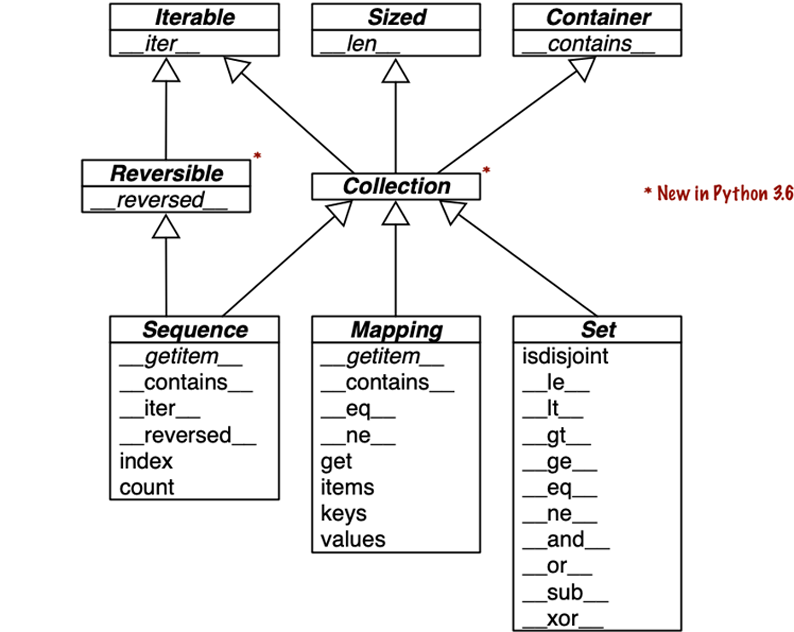

`Iterable` to support for, unpacking, and other forms of iteration

`Sized` to support the `len` built-in function

`Container` to support the in operator

Python does not require concrete classes to actually inherit from any of these ABCs. Any class that implements `__len__` satisfies the `Sized` interface.

Three very important specializations of `Collection` are:

`Sequence`, formalizing the interface of built-ins like `list` and `str`

`Mapping`, implemented by `dict`, `collections.defaultdict`, etc.

`Set`, the interface of the `set` and `frozenset` built-in types

*Only `Sequence` is Reversible, because sequences support arbitrary ordering of their contents, while mappings and sets do not.*

Since Python 3.7, the dict type is officially `“ordered`,” but that only means that the key insertion order is preserved. You cannot rearrange the keys in a dict however you like.

All the special methods in the `Set` ABC implement infix operators. For example, `a & b` computes the intersection of sets `a` and `b`, and is implemented in the `__and__` special method.

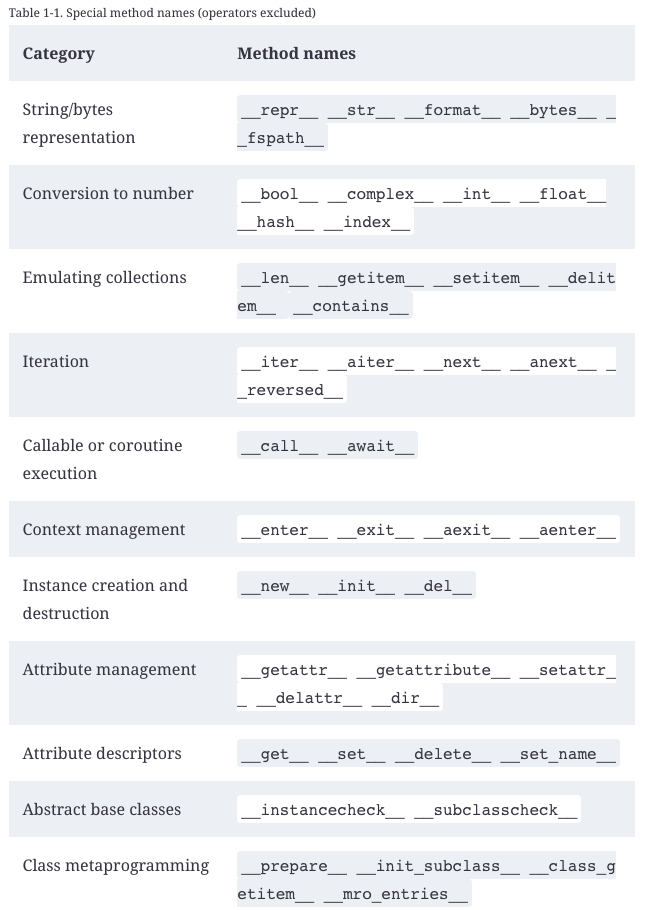